In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [2]:
# Import necessary libraries
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re

In [3]:
#open the NLTK Downloader window, download the `stopwords` resource
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\brian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
#test if it has been installed correctly
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [5]:
from nltk.corpus import stopwords

# Get the English stop words list
stop_words = stopwords.words('english')

# Print the stop words
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [6]:
import os

# Specify the file name or path
file_name = "ENGLISH_youtube_comments.csv"

# Get the absolute path of the file
file_path = os.path.abspath(file_name)

# Print the file path
print("File location:", file_path)

File location: C:\Users\brian\COMP S460F\ENGLISH_youtube_comments.csv


In [7]:
# wordnet provides semantic relationships between words in the English language
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\brian\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
#step 1 preprocess the data
# Load your dataset
import pandas as pd
from nltk.stem import WordNetLemmatizer
import re

df = pd.read_csv('ENGLISH_youtube_comments.csv')

# Define the English stop words list
stop_words = set(stopwords.words('english'))

# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to preprocess the text
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    
    # Remove punctuation and special characters (keep only alphabets and spaces)
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Tokenize the text by splitting on spaces
    words = text.split()
    
    # Remove stop words
    words = [word for word in words if word not in stop_words]
    
    # Lemmatize the words,reducing a word to its base or root form
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join the words back into a single string
    text = ' '.join(words)
    
    return text

# Apply the preprocessing function to the 'Comment_content' column
df['Comment_preprocessed'] = df['Comment_content'].apply(preprocess_text)

In [9]:
# sample of WordNetLemmatizer

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()


#This will create a `WordNetLemmatizer` object named `lemmatizer` that you can use to lemmatize words.

word = "running"
lemma = lemmatizer.lemmatize(word, pos = 'v')
print(lemma)


#In this example, the word "running" is lemmatized using the `lemmatize()` method, and the resulting lemma is printed to the console. The output will be "run", which is the base form of the word "running".

run


In [10]:
# example of re.sub() function which remove any characters that are not lowercase letters (a-z) or whitespace from the text variable
import re

text = "Python3 is a versatile programming language!"
text = re.sub(r'[^a-z\s]', '', text)
print(text)

ython is a versatile programming language


In [11]:
# example of words=text.split, splitting the text variable into individual words by tokenizing it on spaces

text = "Hello, world!"
words = text.split()

for word in words:
    print(word)

Hello,
world!


In [12]:
# example of join() method
words = ['Python', 'is', 'a', 'powerful', 'and', 'versatile', 'programming', 'language.']
text = ' '.join(words)
print(text)

Python is a powerful and versatile programming language.


In [13]:
df.head()

,Video_title,Comment_id,Comment_content,Time,Username,Channel_user,Likes,Photo_thumbnails,Hearted_by_video_publisher,Comment_preprocessed
0,How to Build Muscle in HALF The Time (Using Sc...,UgwT7F8XkOIRp2E5RNV4AaABAg,Here's a link to the time-saving workouts you ...,4 日前,@JeremyEthier,UCERm5yFZ1SptUEU4wZ2vJvw,25,https://yt3.ggpht.com/ytc/APkrFKbBodUzGTci1r8S...,False,here link timesaving workout download httpsbui...
1,How to Build Muscle in HALF The Time (Using Sc...,Ugzw_yf9hzerBABxMed4AaABAg,Having a well-structured workout plan is key. ...,4 日前,@VitalityFitnessScience,UC84Cz2Z1wMjcwU2JDFj5DRg,86,https://yt3.ggpht.com/rAN9DXDhiJescfxC4ZIfZC-b...,False,wellstructured workout plan key break long sho...
2,How to Build Muscle in HALF The Time (Using Sc...,Ugw-Feb4--wmV5HjU8d4AaABAg,00:20 Strategy 1 Minimal volume\n04:30 Strateg...,4 日前 (已編輯),@juliafloridausa,UCwtdHRcJtkOb9A3ZCrASo0g,82,https://yt3.ggpht.com/ytc/APkrFKYiYkMWvK00GM6X...,False,strategy minimal volume strategy supersets str...
3,How to Build Muscle in HALF The Time (Using Sc...,Ugx5_EwY8B9Vg5DDr854AaABAg,Some of my best progress was in a home gym doi...,4 日前,@jamaallewis3520,UCG3htk6YFDsliBck0PE6gMA,3,https://yt3.ggpht.com/ytc/APkrFKacTctnc9p6doY8...,False,best progress home gym set per week focusing p...
4,How to Build Muscle in HALF The Time (Using Sc...,UgzNhcTEKRe-Z0aWuZ54AaABAg,This is really good to know and matches with w...,3 日前,@Erydanus,UCpKX47qNIVXCyJj4IOENr6w,3,https://yt3.ggpht.com/IfiRMFgh9VjE_D1cm7QHjrRb...,False,really good know match ive im older started wo...


In [14]:
#print the first few preprocessed comments
print(df['Comment_preprocessed'].head(30))

0     here link timesaving workout download httpsbui...
1     wellstructured workout plan key break long sho...
2     strategy minimal volume strategy supersets str...
3     best progress home gym set per week focusing p...
4     really good know match ive im older started wo...
5     hey jeremy new study science research id love ...
6     last couple year ive day full body split x foc...
7     thank much free workout program wisdom ive str...
8     included drop set last month effective cut tim...
9     hi jeremy first want thank valuable content ac...
10    hi jeremy think set dropsets would work like r...
11    huge factor motivation consistency injury prev...
12    good stuff downside drop set end hogging bunch...
13    hey thanks awesome video im fairly fit biceps ...
14    ive myo rep lately thats fantastic saving time...
15    love channelits always informativekeep great work
16    minimal volume worked wonder set find need way...
17              thanks plan jeremy always coming

In [15]:
df[['Comment_content','Comment_preprocessed']].to_csv('comment_vs_pre.csv', encoding='utf-8-sig', index=False)

In [16]:
df[['Comment_content','Comment_preprocessed']].head(60)

,Comment_content,Comment_preprocessed
0,Here's a link to the time-saving workouts you ...,here link timesaving workout download httpsbui...
1,Having a well-structured workout plan is key. ...,wellstructured workout plan key break long sho...
2,00:20 Strategy 1 Minimal volume\n04:30 Strateg...,strategy minimal volume strategy supersets str...
3,Some of my best progress was in a home gym doi...,best progress home gym set per week focusing p...
4,This is really good to know and matches with w...,really good know match ive im older started wo...
5,Hey Jeremy! With all the new studys and scienc...,hey jeremy new study science research id love ...
6,For the last couple years I've been doing a 3-...,last couple year ive day full body split x foc...
7,Thank you so much for the free workout program...,thank much free workout program wisdom ive str...
8,I have included drop sets ( #3 ) the last 6 mo...,included drop set last month effective cut tim...
9,"Hi Jeremy, first of all I want to thank you fo...",hi jeremy first want thank valuable content ac...


In [17]:
# step2: create a TF-IDF vectorizer and use it to convert the preprocessed text into numerical features
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the preprocessed 'Comment_processed' data and transform the data
X = vectorizer.fit_transform(df['Comment_preprocessed'])

# Now, 'X' is a numerical representation of 'Comment_content' that can be used to train an SVM

In [18]:
print("Shape of the TF-IDF features matrix:", X.shape)

Shape of the TF-IDF features matrix: (212, 1455)


In [20]:
# Convert the matrix to a DataFrame for easier viewing
features_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

# Print the first few records
print(features_df.head())
#display the number of comments and unique words found by the vectorizer, 
#as well as the TF-IDF scores for the first few comments

    ab  abandon  ability  able  abruptly  absolute  absolutely  abstract  \
0  0.0      0.0      0.0   0.0       0.0       0.0         0.0       0.0   
1  0.0      0.0      0.0   0.0       0.0       0.0         0.0       0.0   
2  0.0      0.0      0.0   0.0       0.0       0.0         0.0       0.0   
3  0.0      0.0      0.0   0.0       0.0       0.0         0.0       0.0   
4  0.0      0.0      0.0   0.0       0.0       0.0         0.0       0.0   

   according  accuracy  ...  write  xml      year  yes  yet  youll  younger  \
0        0.0       0.0  ...    0.0  0.0  0.000000  0.0  0.0    0.0      0.0   
1        0.0       0.0  ...    0.0  0.0  0.000000  0.0  0.0    0.0      0.0   
2        0.0       0.0  ...    0.0  0.0  0.000000  0.0  0.0    0.0      0.0   
3        0.0       0.0  ...    0.0  0.0  0.000000  0.0  0.0    0.0      0.0   
4        0.0       0.0  ...    0.0  0.0  0.143634  0.0  0.0    0.0      0.0   

   youre  youtube  youve  
0    0.0      0.0    0.0  
1    0.0      

In [21]:
# Display the number of comments
num_comments = features_df.shape[0]
print(f'Number of comments: {num_comments}')
# Display the number of unique words
num_unique_words = features_df.shape[1]
print(f'Number of unique words: {num_unique_words}')
# Display the TF-IDF scores for the first few comments
print('TF-IDF scores for the first few comments:')
print(features_df.head())

Number of comments: 212
Number of unique words: 1455
TF-IDF scores for the first few comments:
    ab  abandon  ability  able  abruptly  absolute  absolutely  abstract  \
0  0.0      0.0      0.0   0.0       0.0       0.0         0.0       0.0   
1  0.0      0.0      0.0   0.0       0.0       0.0         0.0       0.0   
2  0.0      0.0      0.0   0.0       0.0       0.0         0.0       0.0   
3  0.0      0.0      0.0   0.0       0.0       0.0         0.0       0.0   
4  0.0      0.0      0.0   0.0       0.0       0.0         0.0       0.0   

   according  accuracy  ...  write  xml      year  yes  yet  youll  younger  \
0        0.0       0.0  ...    0.0  0.0  0.000000  0.0  0.0    0.0      0.0   
1        0.0       0.0  ...    0.0  0.0  0.000000  0.0  0.0    0.0      0.0   
2        0.0       0.0  ...    0.0  0.0  0.000000  0.0  0.0    0.0      0.0   
3        0.0       0.0  ...    0.0  0.0  0.000000  0.0  0.0    0.0      0.0   
4        0.0       0.0  ...    0.0  0.0  0.143634  0.

In [22]:
features_df.to_csv('numerical_representation_for_comments.csv', encoding='utf-8-sig', index=False)

In [23]:
# VADER is a popular sentiment analysis tool that is specifically designed for analyzing sentiment in social media text
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\brian\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [24]:
### example from above only

from nltk.sentiment import SentimentIntensityAnalyzer

# Create an instance of the SentimentIntensityAnalyzer class
sia = SentimentIntensityAnalyzer()

# Analyze the sentiment of a sentence
sentence = "I love this movie! It's amazing!"
sentiment_scores = sia.polarity_scores(sentence)

# Print the sentiment scores
print(sentiment_scores)

{'neg': 0.0, 'neu': 0.259, 'pos': 0.741, 'compound': 0.8619}


In [25]:
# step3 label encoding

#use a sentiment analysis to automatically assign sentiment labels
sia = SentimentIntensityAnalyzer()

comments = df['Comment_content']
sentiment_labels = []

for comment in comments:
    polarity_score = sia.polarity_scores(comment)  # polarity_scores is used to get the sentiment scores of a function
    if polarity_score['compound'] > 0.05:
        sentiment_labels.append('positive')
    elif polarity_score['compound'] < -0.05:
        sentiment_labels.append('negative')
    else:
        sentiment_labels.append('neutral')       # can adjust threshould value(0.05 and -0.05) 
# Create a new column for the sentiment labels
df['Sentiment'] = sentiment_labels

# Print the first few records to check
print(df.head())


                                         Video_title  \
0  How to Build Muscle in HALF The Time (Using Sc...   
1  How to Build Muscle in HALF The Time (Using Sc...   
2  How to Build Muscle in HALF The Time (Using Sc...   
3  How to Build Muscle in HALF The Time (Using Sc...   
4  How to Build Muscle in HALF The Time (Using Sc...   

                   Comment_id  \
0  UgwT7F8XkOIRp2E5RNV4AaABAg   
1  Ugzw_yf9hzerBABxMed4AaABAg   
2  Ugw-Feb4--wmV5HjU8d4AaABAg   
3  Ugx5_EwY8B9Vg5DDr854AaABAg   
4  UgzNhcTEKRe-Z0aWuZ54AaABAg   

                                     Comment_content        Time  \
0  Here's a link to the time-saving workouts you ...        4 日前   
1  Having a well-structured workout plan is key. ...        4 日前   
2  00:20 Strategy 1 Minimal volume\n04:30 Strateg...  4 日前 (已編輯)   
3  Some of my best progress was in a home gym doi...        4 日前   
4  This is really good to know and matches with w...        3 日前   

                  Username              Channel_user Li

In [26]:
df[['Comment_content', 'Comment_preprocessed','Sentiment']].head(30)

,Comment_content,Comment_preprocessed,Sentiment
0,Here's a link to the time-saving workouts you ...,here link timesaving workout download httpsbui...,positive
1,Having a well-structured workout plan is key. ...,wellstructured workout plan key break long sho...,neutral
2,00:20 Strategy 1 Minimal volume\n04:30 Strateg...,strategy minimal volume strategy supersets str...,neutral
3,Some of my best progress was in a home gym doi...,best progress home gym set per week focusing p...,positive
4,This is really good to know and matches with w...,really good know match ive im older started wo...,positive
5,Hey Jeremy! With all the new studys and scienc...,hey jeremy new study science research id love ...,positive
6,For the last couple years I've been doing a 3-...,last couple year ive day full body split x foc...,positive
7,Thank you so much for the free workout program...,thank much free workout program wisdom ive str...,positive
8,I have included drop sets ( #3 ) the last 6 mo...,included drop set last month effective cut tim...,positive
9,"Hi Jeremy, first of all I want to thank you fo...",hi jeremy first want thank valuable content ac...,positive


In [27]:
# convert the categorical label to numbers
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the 'Sentiment' column
df['Sentiment_label_numbers'] = le.fit_transform(df['Sentiment'])

# Print the first few records to check
print(df.head())

                                         Video_title  \
0  How to Build Muscle in HALF The Time (Using Sc...   
1  How to Build Muscle in HALF The Time (Using Sc...   
2  How to Build Muscle in HALF The Time (Using Sc...   
3  How to Build Muscle in HALF The Time (Using Sc...   
4  How to Build Muscle in HALF The Time (Using Sc...   

                   Comment_id  \
0  UgwT7F8XkOIRp2E5RNV4AaABAg   
1  Ugzw_yf9hzerBABxMed4AaABAg   
2  Ugw-Feb4--wmV5HjU8d4AaABAg   
3  Ugx5_EwY8B9Vg5DDr854AaABAg   
4  UgzNhcTEKRe-Z0aWuZ54AaABAg   

                                     Comment_content        Time  \
0  Here's a link to the time-saving workouts you ...        4 日前   
1  Having a well-structured workout plan is key. ...        4 日前   
2  00:20 Strategy 1 Minimal volume\n04:30 Strateg...  4 日前 (已編輯)   
3  Some of my best progress was in a home gym doi...        4 日前   
4  This is really good to know and matches with w...        3 日前   

                  Username              Channel_user Li

In [28]:
df[['Comment_content','Comment_preprocessed', 'Sentiment','Sentiment_label_numbers']].to_csv('sentiment_labels.csv', index=False)

In [29]:
df[['Comment_content','Comment_preprocessed', 'Sentiment','Sentiment_label_numbers']].head(40)

,Comment_content,Comment_preprocessed,Sentiment,Sentiment_label_numbers
0,Here's a link to the time-saving workouts you ...,here link timesaving workout download httpsbui...,positive,2
1,Having a well-structured workout plan is key. ...,wellstructured workout plan key break long sho...,neutral,1
2,00:20 Strategy 1 Minimal volume\n04:30 Strateg...,strategy minimal volume strategy supersets str...,neutral,1
3,Some of my best progress was in a home gym doi...,best progress home gym set per week focusing p...,positive,2
4,This is really good to know and matches with w...,really good know match ive im older started wo...,positive,2
5,Hey Jeremy! With all the new studys and scienc...,hey jeremy new study science research id love ...,positive,2
6,For the last couple years I've been doing a 3-...,last couple year ive day full body split x foc...,positive,2
7,Thank you so much for the free workout program...,thank much free workout program wisdom ive str...,positive,2
8,I have included drop sets ( #3 ) the last 6 mo...,included drop set last month effective cut tim...,positive,2
9,"Hi Jeremy, first of all I want to thank you fo...",hi jeremy first want thank valuable content ac...,positive,2


In [30]:
#step4 split data into train set and test set

from sklearn.model_selection import train_test_split

# Get the labels column
labels = df['Sentiment']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features_df, labels, test_size=0.2, random_state=42)

# Now the data is split into training and testing sets

In [31]:
# SVM model
from sklearn.svm import SVC

# Initialize the SVM model
model = SVC()

# Train the model with your training data
model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 0.8837209302325582


<AxesSubplot:xlabel='X', ylabel='Y'>

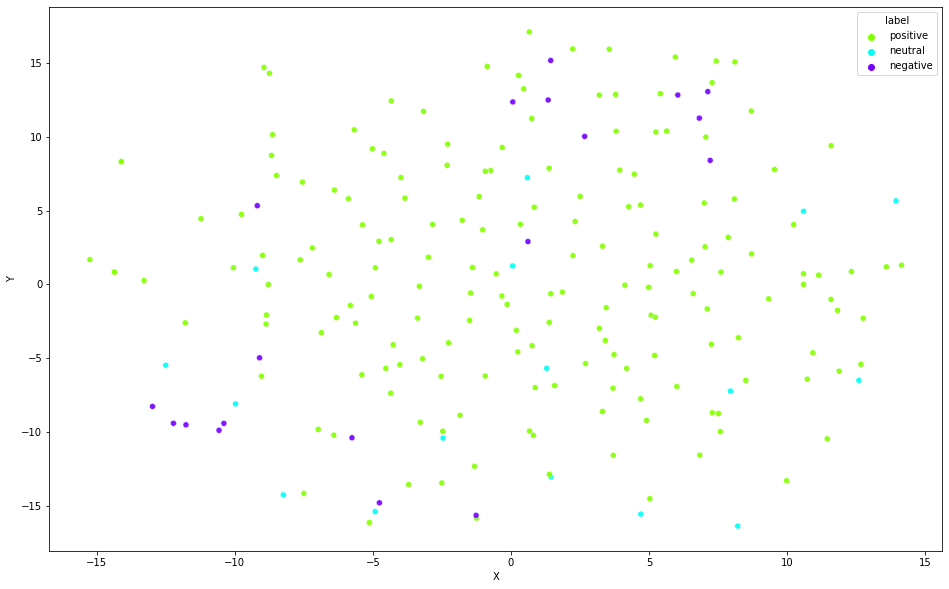

In [32]:
# t-SNE Visualization:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Apply t-SNE to the TF-IDF matrix
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X.toarray())  # Replace 'X' with your TF-IDF matrix

# Create a DataFrame with t-SNE dimensions and labels
tsne_df = pd.DataFrame(data = {
    'X': X_tsne[:,0],
    'Y': X_tsne[:,1],
    'label': df['Sentiment']  # Replace with your label column
})

# Plot the results
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="X", y="Y",
    hue="label",
    palette=sns.color_palette("hsv", 3),
    data=tsne_df,
    legend="full",
    alpha=0.9
)

<AxesSubplot:xlabel='X', ylabel='Y'>

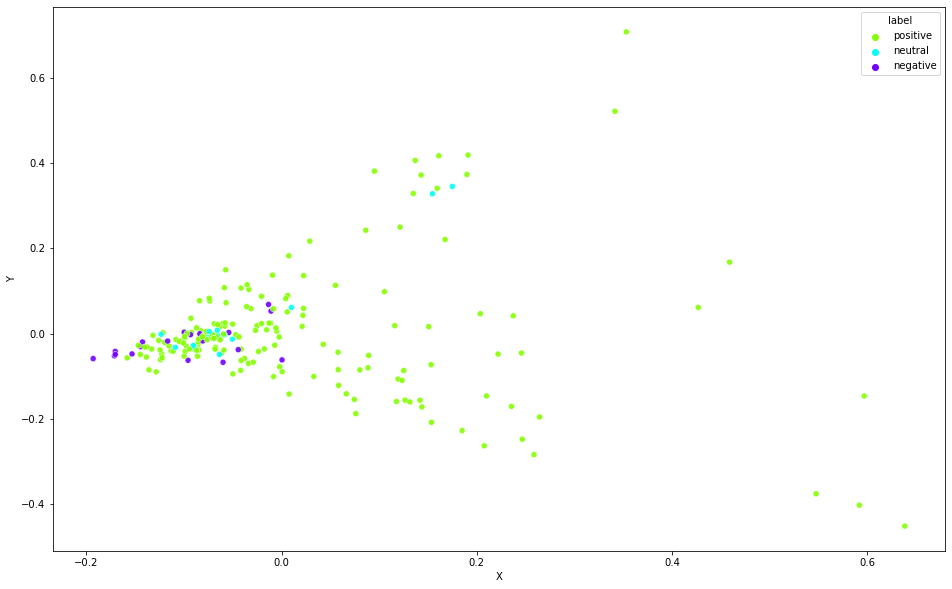

In [33]:
# PCA Visualization

from sklearn.decomposition import PCA

# Apply PCA to the TF-IDF matrix
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())  # Replace 'X' with your TF-IDF matrix

# Create a DataFrame with PCA dimensions and labels
pca_df = pd.DataFrame(data = {
    'X': X_pca[:,0],
    'Y': X_pca[:,1],
    'label': df['Sentiment']  # Replace with your label column
})

# Plot the results
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="X", y="Y",
    hue="label",
    palette=sns.color_palette("hsv", 3),
    data=pca_df,
    legend="full",
    alpha=0.9
)

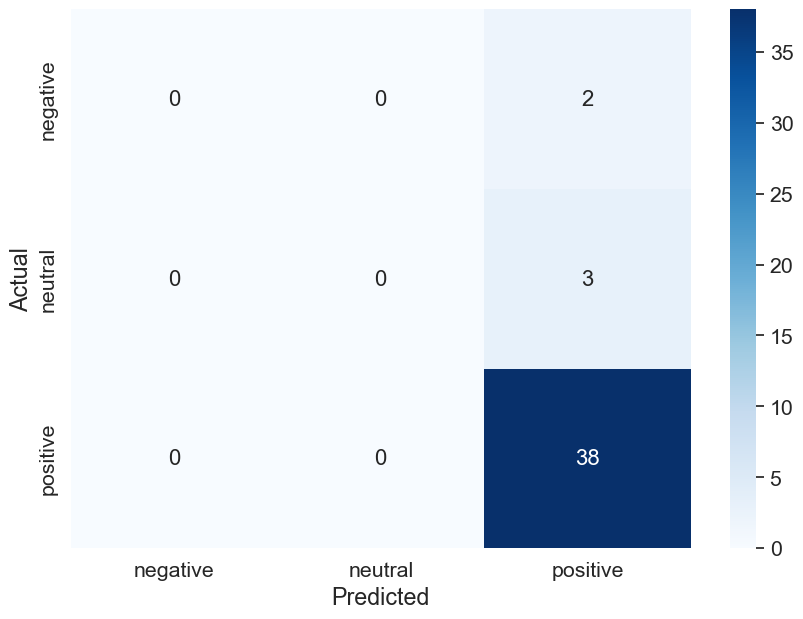

In [104]:
# confusion matrix

import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
cm_df.index.name = 'Actual'
cm_df.columns.name = 'Predicted'

# Create a heatmap from the DataFrame
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm_df, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')

plt.show()

In [34]:
# L1 Logistic Regression for embedded feature selection
# https://www.youtube.com/watch?v=_aGWjt7GKBE
# https://necromuralist.github.io/student_intervention/choosing_best_model.html#:~:text=C%20is%20the%20inverse%20of,the%20coefficients%20it%20will%20have
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

lr1 = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', multi_class='ovr')
# Note that C=1.0 is the default. You can increase
# or decrease it to make the regulariztion effect
# stronger or weaker, respectively.
lr1.fit(X_train_std, y_train)
print('Training accuracy:', lr1.score(X_train_std, y_train))
print('Test accuracy:', lr1.score(X_test_std, y_test))

Training accuracy: 1.0
Test accuracy: 0.8837209302325582


In [35]:
lr1.intercept_

array([-3.62334418, -3.8631739 ,  2.7072036 ])

In [42]:
import numpy as np
np.set_printoptions(8)

In [37]:
lr1.coef_[lr1.coef_!=0].shape

(241,)

In [43]:
lr1.coef_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

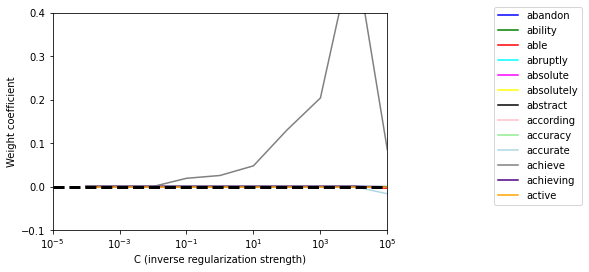

In [50]:
#LASSO PATH
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr1 = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear', 
                            multi_class='ovr', random_state=0)
    lr1.fit(X_train_std, y_train)
    weights.append(lr1.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=features_df.columns[column+1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylim([-0.1, 0.4])
plt.ylabel('Weight coefficient')
plt.xlabel('C (inverse regularization strength)')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.45, 1.05),
          ncol=1, fancybox=True)
plt.savefig('lasso-path.pdf', dpi=600, 
            bbox_inches='tight', pad_inches=0.2)
plt.show()

In [45]:
# L2 Logistic Regression for embedded feature selection
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

lr2 = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', multi_class='ovr')
# Note that C=1.0 is the default. You can increase
# or decrease it to make the regulariztion effect
# stronger or weaker, respectively.
lr2.fit(X_train_std, y_train)
print('Training accuracy:', lr2.score(X_train_std, y_train))
print('Test accuracy:', lr2.score(X_test_std, y_test))

Training accuracy: 1.0
Test accuracy: 0.6744186046511628


In [46]:
lr2.intercept_

array([-1.83976689, -2.83111319,  1.45388718])

In [47]:
import numpy
np.set_printoptions(8)

In [48]:
lr2.coef_[lr2.coef_!=0].shape

(3774,)

In [49]:
lr2.coef_

array([[ 7.53750946e-02, -1.90219107e-02, -2.33925538e-02, ...,
         2.20062955e-02, -5.58673325e-03, -1.20920769e-02],
       [-4.07061588e-03,  8.66308022e-05, -1.33679648e-02, ...,
         1.01702206e-01, -1.26870785e-02, -1.15006839e-02],
       [-5.67406747e-02,  1.68087445e-02,  3.00467994e-02, ...,
        -7.04051639e-02,  1.65152656e-02,  2.02349663e-02]])

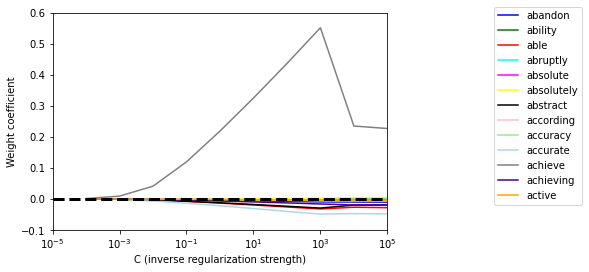

In [51]:
#RIDGE PATH
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr2 = LogisticRegression(penalty='l2', C=10.**c, solver='liblinear', 
                            multi_class='ovr', random_state=0)
    lr2.fit(X_train_std, y_train)
    weights.append(lr2.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=features_df.columns[column+1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylim([-0.1, 0.6])
plt.ylabel('Weight coefficient')
plt.xlabel('C (inverse regularization strength)')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.45, 1.05),
          ncol=1, fancybox=True)
plt.savefig('lasso-path.pdf', dpi=600, 
            bbox_inches='tight', pad_inches=0.2)
plt.show()

In [52]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

model_naive = MultinomialNB().fit(X_train, y_train) 
predicted_naive = model_naive.predict(X_test)

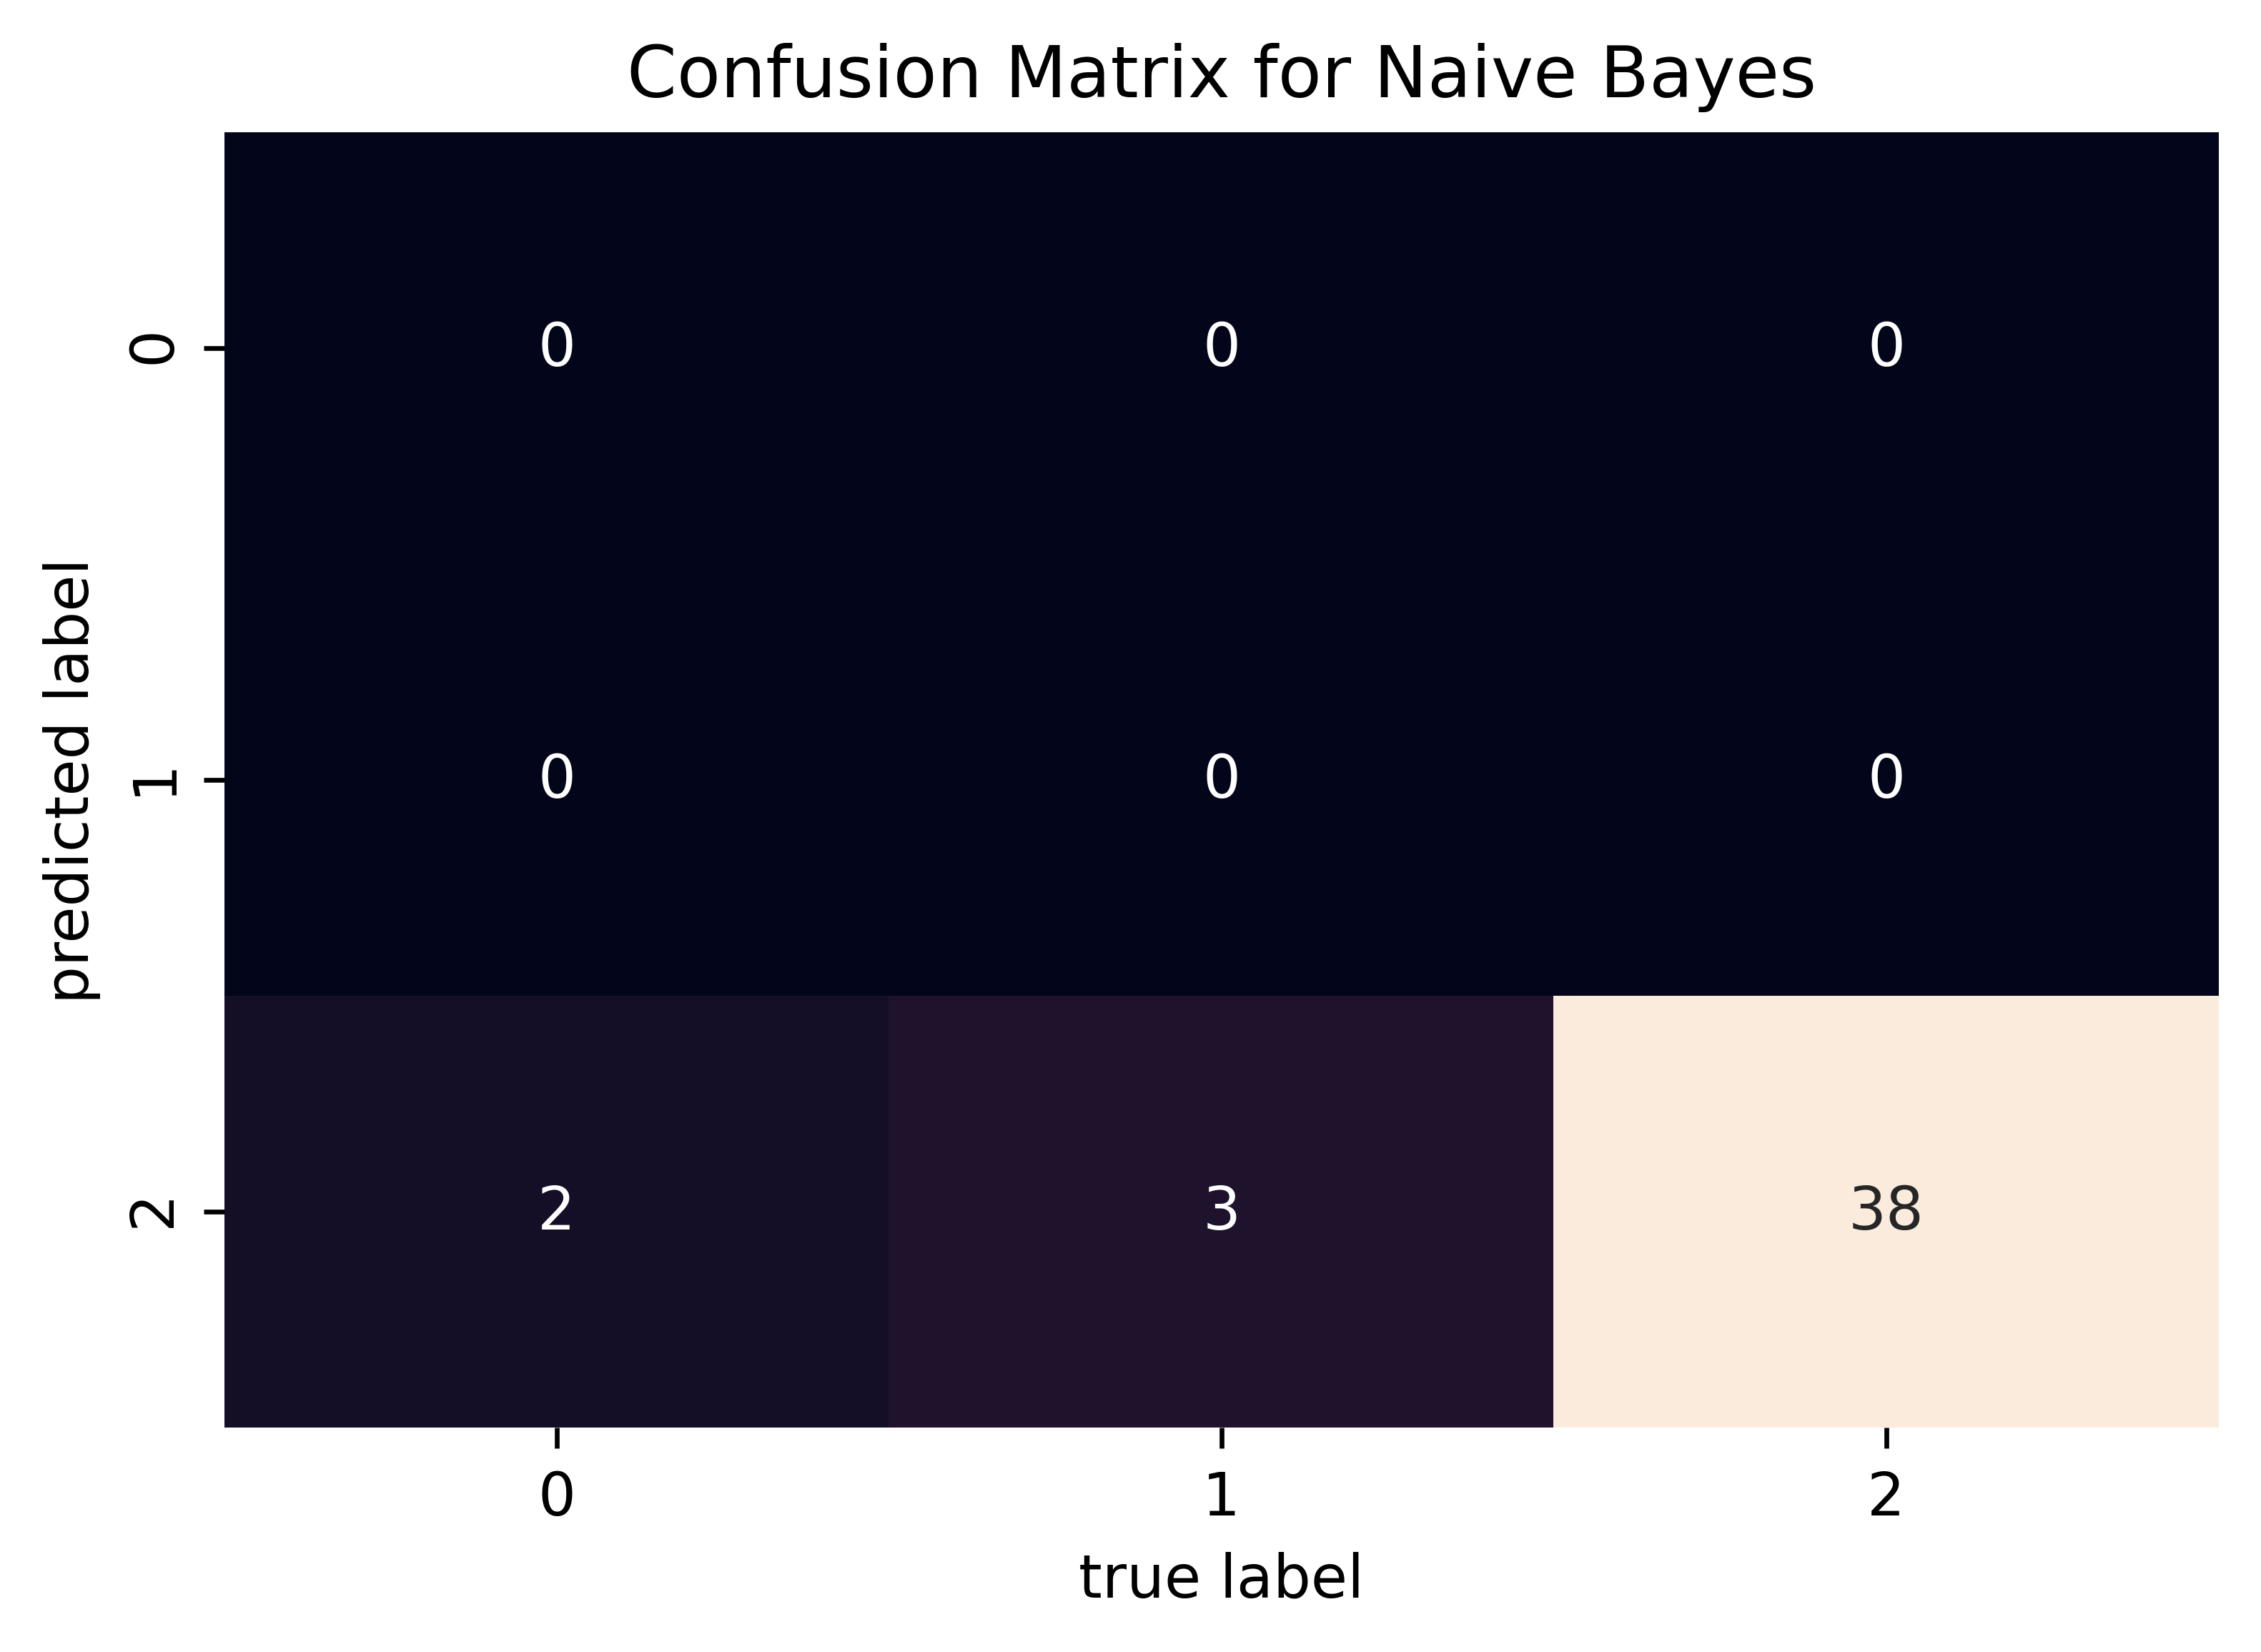

In [53]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("confusion_matrix.png")
plt.show()

In [55]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print(training_data_accuracy)

X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print(test_data_accuracy)

0.9053254437869822
0.8837209302325582


In [56]:
from sklearn.metrics import precision_score

# precision for training data predictions
precision_train = precision_score(y_train, X_train_prediction, average='macro')
print('Training data Precision =', precision_train)

# precision for test data predictions
precision_test = precision_score(y_test, X_test_prediction, average='macro')
print('Test data Precision =', precision_test)

# https://blog.csdn.net/weixin_44436677/article/details/105985358

Training data Precision = 0.632258064516129
Test data Precision = 0.29457364341085274


C:\Users\brian\Downloads\PythonSetUp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
from sklearn.metrics import recall_score

# recall for training data predictions
recall_train = recall_score(y_train, X_train_prediction, average='macro')
print('Training data Recall =', recall_train)

# precision for test data predictions
recall_test = recall_score(y_test, X_test_prediction, average='macro')
print('Test data Recall =', recall_test)

Training data Recall = 0.6078431372549019
Test data Recall = 0.3333333333333333


In [58]:
# F1 = 2 * (precision * recall) / (precision + recall)
from sklearn.metrics import f1_score

# F1 score for training data predictions
f1_score_train = f1_score(y_train, X_train_prediction, average='macro')
print('Training data F1 Score =', f1_score_train)

# F1 Score for test data predictions
f1_score_test = recall_score(y_test, X_test_prediction, average='macro')
print('Test data F1 Score =', f1_score_test)

Training data F1 Score = 0.6162680125813766
Test data F1 Score = 0.3333333333333333
